Izbrana grafa:


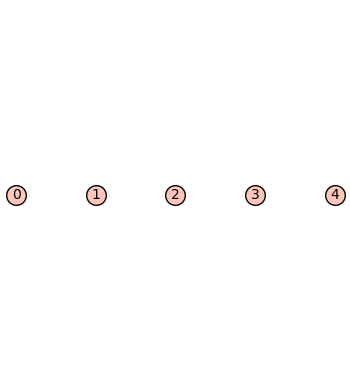

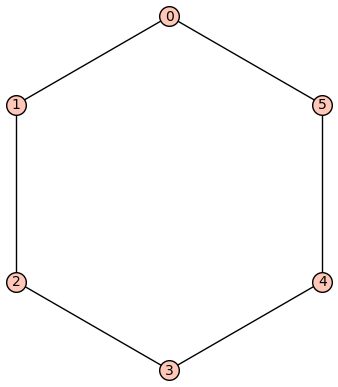

Dominacijsko število za prvi izbrani graf: 5
Dominacijsko število za drugi izbrani graf: 2
Kartezični produkt:


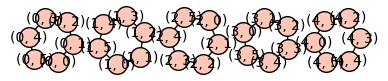

Dominacijsko število za kartezični produkt: 10


In [6]:
import random
from sage.numerical.mip import MixedIntegerLinearProgram

# Funkcija za izračun dominacijskega števila - najverjetneje je nekaj narobe, spremeni jo s tisto na Githubu
def Dominacijsko_stevilo(g):
    h = g.complement() 

    # Nastavimo problem linearnega programiranja (LP)
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)
    p.set_objective(sum([x[v] for v in g.vertices()]))

    for v in g.vertices():
        sosedi = g.neighbors(v)  # Seznam sosedov vozlišča v
        if sosedi:
            p.add_constraint(sum((x[w] + x[v]) for w in sosedi) >= 1)
        else:
            p.add_constraint(x[v] == 1)

    zaustavi = False

    # Pogoji za SDCTD dominacijo v komplementu grafa
    for v in g.vertices():
        sosedi_komplement = h.neighbors(v)  # Sosedje v komplementarnem grafu
        if sosedi_komplement:
            p.add_constraint(sum(x[w] for w in sosedi_komplement) >= 1)
        else:
            print("Slaba, graf nima SDCTD dominacije")
            zaustavi = True
            break

    # Rešimo problem in preštejemo izbrana vozlišča, če je SDCTD dominacija veljavna
    if not zaustavi:
        p.solve()
        x_values = p.get_values(x)
        prestej_izbrana_vozlisca = sum(1 for i in x_values.values() if i == 1)
        return prestej_izbrana_vozlisca
    else:
        return None

# 1. Naredimo dva poljubna aciklična grafa
g1 = graphs.RandomTree(5)  # Naključno drevo s 5 vozlišči
g2 = graphs.RandomTree(6)  # Naključno drevo s 6 vozlišči

# 2. Naredimo dva poljubna ciklična grafa
g3 = graphs.RandomGNP(5, 0.5)  # Naključni graf z verjetnostjo povezave 0.5
g4 = graphs.CycleGraph(6)      # Cikel s 6 vozlišči

# 3. Naključno izberemo dva grafa izmed g1, g2, g3, g4
grafi = random.sample([g1, g2, g3, g4], 2)

# 4. Naredimo kartezični produkt izbranih dveh grafov
kartezicni_produkt = grafi[0].cartesian_product(grafi[1])

# 5. Izračunamo dominacijsko število za izbrana grafa in za kartezični produkt
dominacijsko_stevilo_graf1 = Dominacijsko_stevilo(grafi[0])
dominacijsko_stevilo_graf2 = Dominacijsko_stevilo(grafi[1])
dominacijsko_stevilo_produkt = Dominacijsko_stevilo(kartezicni_produkt)

# 6. Prikaz rezultatov
print("Izbrana grafa:")
show(grafi[0])
show(grafi[1])
print(f"Dominacijsko število za prvi izbrani graf: {dominacijsko_stevilo_graf1}")
print(f"Dominacijsko število za drugi izbrani graf: {dominacijsko_stevilo_graf2}")

print("Kartezični produkt:")
show(kartezicni_produkt)
print(f"Dominacijsko število za kartezični produkt: {dominacijsko_stevilo_produkt}")
